In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
property21 = pd.read_csv("/Users/sam/Desktop/Data Mining Project/data2021-full.csv")

In [3]:
#displays all columns in the dataset
property21.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY',
       'ZIPCODE', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE',
       'OWN_OCC', 'OWNER', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_CITY',
       'MAIL_STATE', 'MAIL_ZIPCODE', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS',
       'COM_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE',
       'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL',
       'EXT_FINISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHEN', 'TT_RMS', 'BDRM_COND', 'BTHRM_STYLE1',
       'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1',
       'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE',
       'FIRE_PLACE', 'PlUMBING', 'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')

In [4]:
#data cleaning
property21["LAND_VALUE"] = property21["LAND_VALUE"].str.replace("[$, ]","")
property21["BLDG_VALUE"] = property21["BLDG_VALUE"].str.replace("[$, ]","")
property21["TOTAL_VALUE"] =  property21["TOTAL_VALUE"].str.replace("[$, ]","")
property21["GROSS_TAX"] = property21["GROSS_TAX"].str.replace("[$, ]","")
property21 = property21.astype({'LAND_VALUE': float,'BLDG_VALUE': float,'TOTAL_VALUE': float,'GROSS_TAX': float,'GROSS_AREA': float,'LIVING_AREA': float})

<ipython-input-4-1e3a879a547f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  property21["LAND_VALUE"] = property21["LAND_VALUE"].str.replace("[$, ]","")
<ipython-input-4-1e3a879a547f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  property21["BLDG_VALUE"] = property21["BLDG_VALUE"].str.replace("[$, ]","")
<ipython-input-4-1e3a879a547f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  property21["TOTAL_VALUE"] =  property21["TOTAL_VALUE"].str.replace("[$, ]","")
<ipython-input-4-1e3a879a547f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  property21["GROSS_TAX"] = property21["GROSS_TAX"].str.replace("[$, ]","")


In [5]:
#groupby filters
#data sorted by city
city_property21 = property21.filter(items=['CITY','LAND_VALUE','BLDG_VALUE','TOTAL_VALUE','GROSS_TAX','GROSS_AREA','LIVING_AREA'])

#data sorted by zip code
zip_property21 = property21.filter(items=['ZIPCODE','LAND_VALUE','BLDG_VALUE','TOTAL_VALUE','GROSS_TAX','GROSS_AREA','LIVING_AREA'])

,CITY,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,GROSS_AREA,LIVING_AREA
0,EAST BOSTON,179500.0,539900.0,719400.0,7676.00,3353.0,2202.0
1,EAST BOSTON,180300.0,564500.0,744800.0,7947.02,3299.0,2307.0
2,EAST BOSTON,180800.0,549700.0,730500.0,7794.44,3392.0,2268.0
3,EAST BOSTON,181400.0,486500.0,667900.0,7126.49,3108.0,2028.0
4,EAST BOSTON,202800.0,511400.0,714200.0,7620.52,3700.0,2546.0
...,...,...,...,...,...,...,...
177086,BRIGHTON,240500.0,NaN,240500.0,0.00,NaN,NaN
177087,BRIGHTON,69000.0,NaN,69000.0,736.23,NaN,NaN
177088,BRIGHTON,433600.0,794100.0,1227700.0,13099.56,3981.0,2834.0
177089,BRIGHTON,752800.0,1756800.0,2519100.0,61843.91,14520.0,7260.0


In [14]:

#list of cities
city_list = city_property21['CITY'].unique()

#Average value by city
df_city_mean = city_property21.groupby(by=["CITY"]).mean()
df_city_mean

#Average total value by city
df_totalvalue_city_mean = df_city_mean["TOTAL_VALUE"]
#Average square foot value by city
df_costperfoot_city_mean = df_city_mean["TOTAL_VALUE"]/df_city_mean["LIVING_AREA"] 

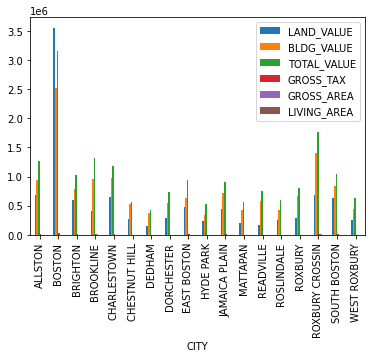

In [7]:
ax = df_city_mean.plot.bar()

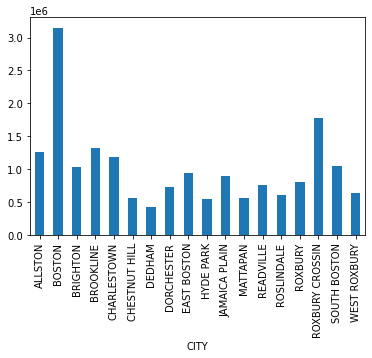

In [17]:
#bar graph of average total value by city
bx = df_totalvalue_city_mean.plot.bar()

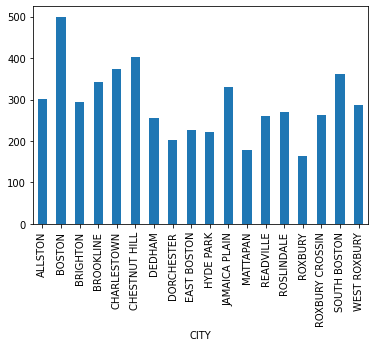

In [16]:
#bar graph of average price per square foot by city
cx = df_costperfoot_city_mean.plot.bar()

In [8]:
#Average value by zipcode
df_zip_mean =zip_property21.groupby(by=["ZIPCODE"]).mean()
df_zip_mean

,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,GROSS_AREA,LIVING_AREA
ZIPCODE,,,,,,
2026,1.518857e+05,3.777000e+05,4.216714e+05,4499.235714,2669.000000,1649.000000
2108,3.618205e+06,2.675358e+06,3.540858e+06,52681.829107,7938.319771,7133.256160
2109,5.746154e+06,2.989764e+06,3.911239e+06,68974.700976,9266.748340,8399.501208
2110,1.454743e+07,4.765236e+06,5.795611e+06,111739.762410,14128.877541,13158.319942
2111,3.914703e+06,2.571749e+06,3.144815e+06,38888.757703,7625.864193,6843.425564
2113,6.628779e+05,7.430849e+05,9.672305e+05,9558.196816,2492.376415,2135.179802
2114,3.458481e+06,2.216342e+06,2.799101e+06,21344.562850,6251.805241,5715.465828
2115,3.934116e+06,3.438527e+06,4.201482e+06,24240.345840,9285.975788,8311.006888
2116,3.710554e+06,2.644616e+06,3.235024e+06,44770.310162,5616.204669,5050.191840
